In [1]:
%load_ext autoreload
%autoreload 1

import pdb

import sys
sys.path.append("../utils")

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")

# utils
from GenreSubsetter import *
from time_series_utils import *

# reload imports
# %aimport GenreSubsetter
%aimport time_series_utils

## Import and transform data to work with time series

In [2]:
genres_df = pd.read_csv("../data/interum/top_genres.csv")
genres_df = genres_df[(genres_df.Super_genre != "general") & (genres_df.release_date_precision == 'day')]


In [3]:
genres_df.release_date = genres_df.release_date.apply(convert_to_datetime)

In [4]:
genres_df.set_index("release_date", inplace=True)

## Plot Features in timeseries by genre

In [9]:
genres_df.columns

Index(['Name', 'Danceability', 'Energy', 'Key', 'Loudness', 'Mode',
       'Speechness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence',
       'Tempo', 'Type', 'ID', 'Uri', 'Ref_Track', 'URL_features',
       'Duration_ms', 'time_signature', 'Genre', 'Expanded_genre',
       'artist_names', 'artist_ids', 'release_date_precision', 'Super_genre'],
      dtype='object')

In [22]:
features = [
    'Danceability', 
    'Energy', 
    'Loudness', 
    'Speechness', 
    'Acousticness', 
    'Instrumentalness', 
    'Liveness', 
    'Valence',
    'Tempo',
    'Duration_ms'
]

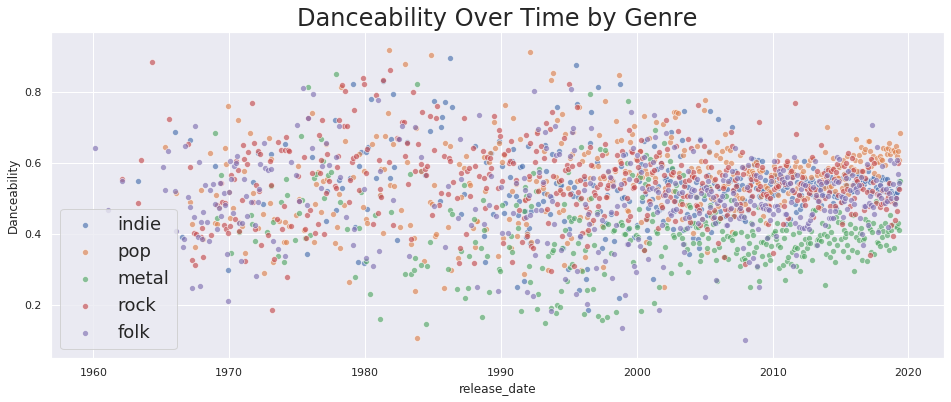

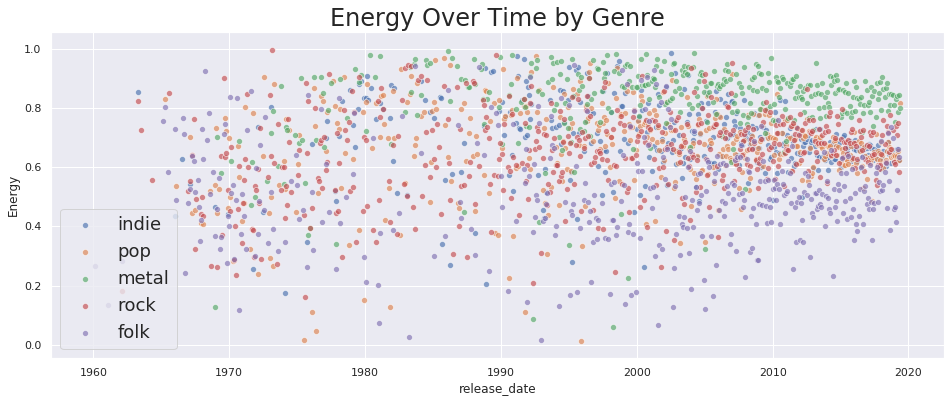

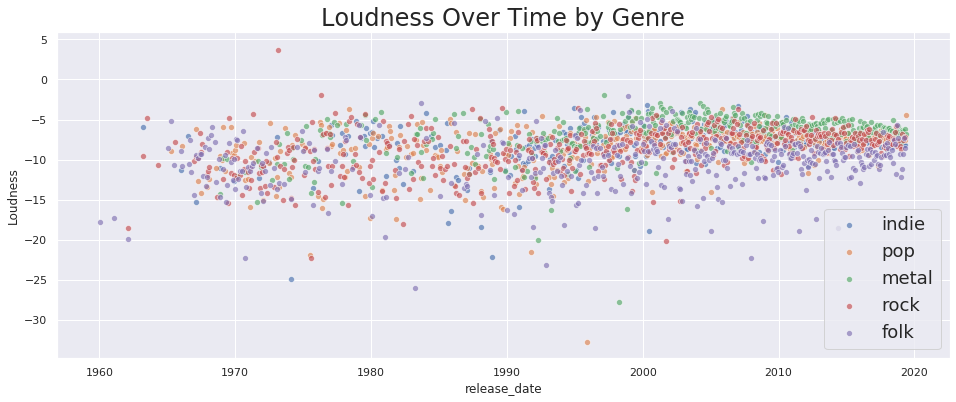

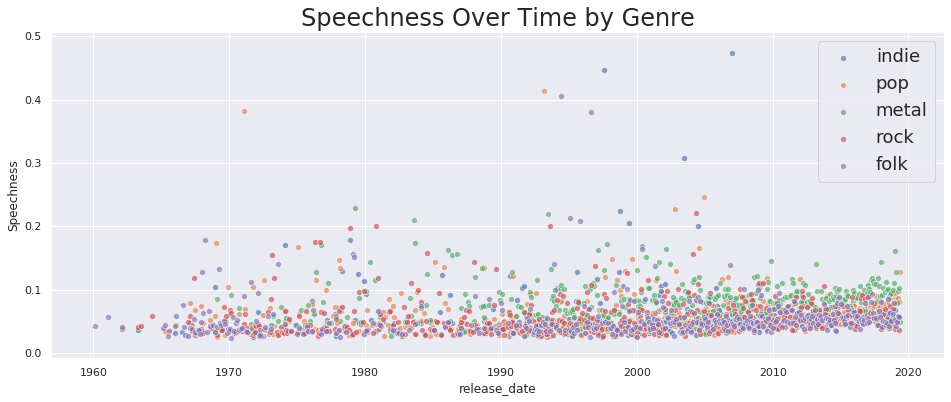

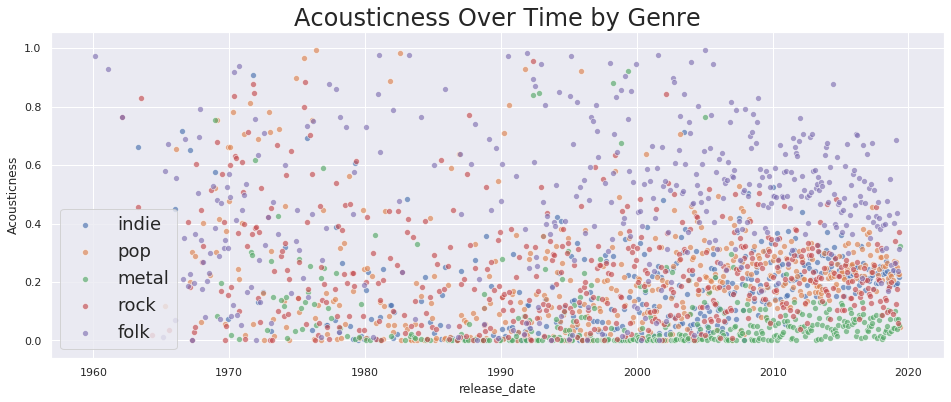

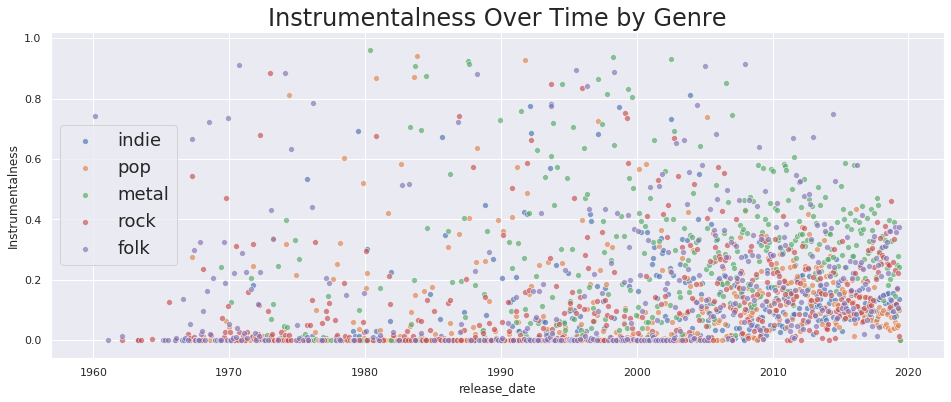

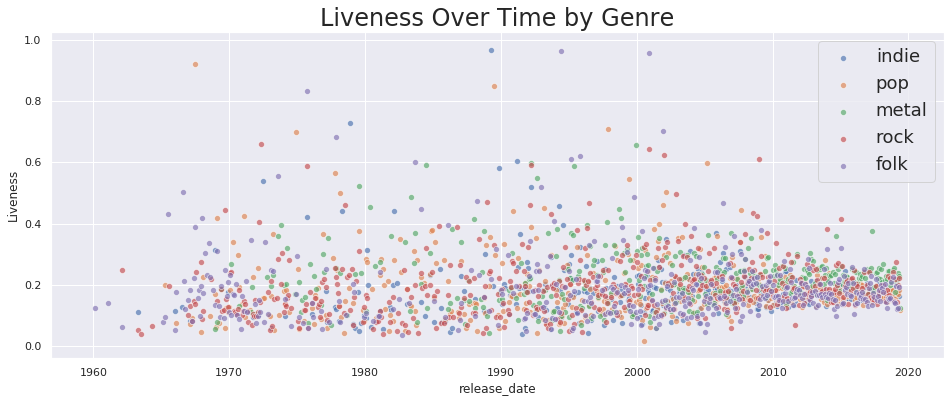

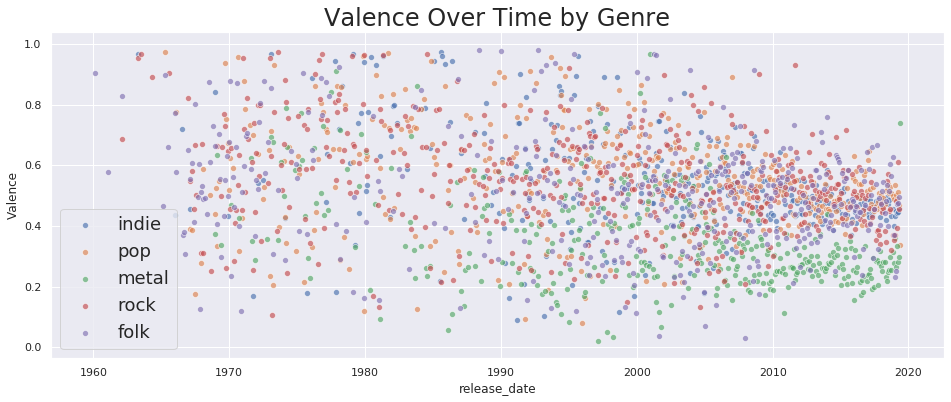

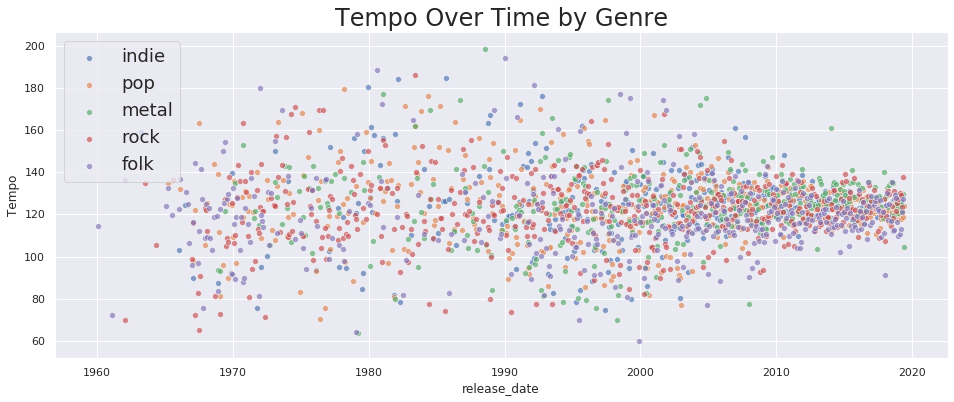

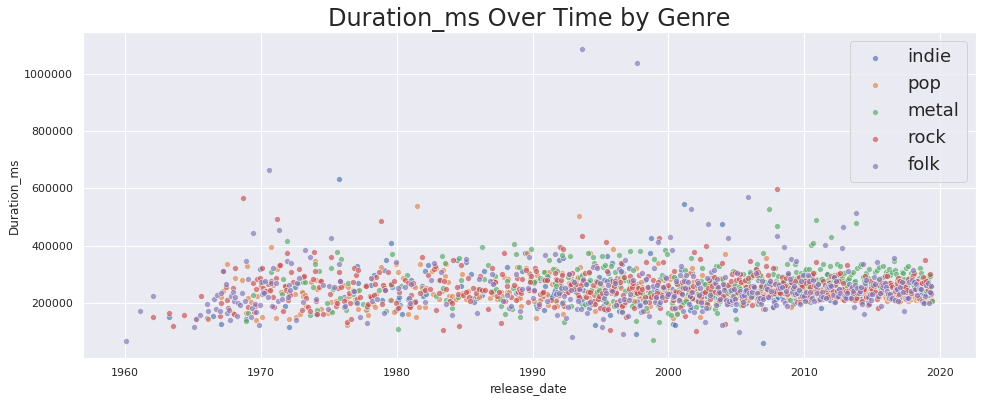

In [25]:

for feature in features:
    plot_genre_features_timeseries(
        df=genres_df, 
        genres=["indie", "pop", "metal", "rock", "folk"], 
        feature=feature, 
        start_year="1960"
    )